In [88]:
import numpy as np
import requests, gzip, os, hashlib

In [89]:
path='C:/Users/nayav/Downloads/archive (2)'
def fetch(url):
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

X = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28,28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [ ]:
sample = 1
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

mnist dataset is available in .gz which is a higher level of zip file, ubyte refers to a from of data manipulation that stores multidimensional matrices keeping a string index(so that the relationship between the image and label is maintained) idx3, idx1 refers to the dimensions, x3 being 3 dimesnions(2 dimensions for each image and third for the various images) 

In [3]:
import pandas as pd
m,n,r = X.shape

cols = [str(i) + '-' + str(j) for i in range(n) for j in range(r)]

adf = pd.DataFrame(X.reshape(m, -1), columns = cols)

print(adf)

       0-0  0-1  0-2  0-3  0-4  0-5  0-6  0-7  0-8  0-9  ...  27-18  27-19  \
0        0    0    0    0    0    0    0    0    0    0  ...      0      0   
1        0    0    0    0    0    0    0    0    0    0  ...      0      0   
2        0    0    0    0    0    0    0    0    0    0  ...      0      0   
3        0    0    0    0    0    0    0    0    0    0  ...      0      0   
4        0    0    0    0    0    0    0    0    0    0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995    0    0    0    0    0    0    0    0    0    0  ...      0      0   
59996    0    0    0    0    0    0    0    0    0    0  ...      0      0   
59997    0    0    0    0    0    0    0    0    0    0  ...      0      0   
59998    0    0    0    0    0    0    0    0    0    0  ...      0      0   
59999    0    0    0    0    0    0    0    0    0    0  ...      0      0   

       27-20  27-21  27-22  27-23  27-24  27-25  27-26  27-27  

here we are converting X-test to a dataframe by redusing the dimensions by combining the 2 dimensions used to explain the image(it is a 28 by28 pixel image)

In [4]:
c=['labels']
df= pd.DataFrame(Y, columns=c)
train= df.join(adf)
train.shape

(60000, 785)

In [5]:
m,n,r= X_test.shape

cols = [str(i) + '-' + str(j) for i in range(n) for j in range(r)]

adf = pd.DataFrame(X_test.reshape(m, -1), columns = cols)

df= pd.DataFrame(Y_test, columns=c)

test= df.join(adf)
test.shape

(10000, 785)

In [6]:
final=pd.concat([train,test])

In [78]:
final

,labels,0-12,0-13,0-14,0-15,1-4,1-5,1-6,1-7,1-8,...,27-14,27-15,27-16,27-17,27-18,27-19,27-20,27-21,27-22,27-23
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we do the same to get labels and combine x and y to get one dataframe. we get 2 dataframes a train and test we combine them to form one final dataframe

In [47]:
final.to_csv('mnisthandwrittendigits.csv')

we export it into .csv file so we can do that seminar thingy

In [8]:
for i in final:
    print(final[i].value_counts())

labels
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64
0-0
0    70000
Name: count, dtype: int64
0-1
0    70000
Name: count, dtype: int64
0-2
0    70000
Name: count, dtype: int64
0-3
0    70000
Name: count, dtype: int64
0-4
0    70000
Name: count, dtype: int64
0-5
0    70000
Name: count, dtype: int64
0-6
0    70000
Name: count, dtype: int64
0-7
0    70000
Name: count, dtype: int64
0-8
0    70000
Name: count, dtype: int64
0-9
0    70000
Name: count, dtype: int64
0-10
0    70000
Name: count, dtype: int64
0-11
0    70000
Name: count, dtype: int64
0-12
0      69998
10         1
116        1
Name: count, dtype: int64
0-13
0      69998
216        1
254        1
Name: count, dtype: int64
0-14
0      69999
216        1
Name: count, dtype: int64
0-15
0    69999
9        1
Name: count, dtype: int64
0-16
0    70000
Name: count, dtype: int64
0-17
0    70000
Name: count, dtype: int64
0-18
0    70000
Name: count, dtype: int

In [9]:
for i in final:
    if(final[i].value_counts()[0]==70000):
        final= final.drop(i,axis=1)

we are removing all the columns which are just zeroes i.e not providing any data

In [10]:
final.shape

(70000, 720)

In [11]:
import matplotlib.pyplot as plt

In [80]:
print(final.isnull().sum())#searching for null values

labels    0
0-12      0
0-13      0
0-14      0
0-15      0
         ..
27-19     0
27-20     0
27-21     0
27-22     0
27-23     0
Length: 720, dtype: int64


In [13]:
Y=final['labels']
X=final.drop('labels',axis=1)

after this the usual train test split fitting predicting tests etc

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred=knn.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9691


In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2280    1    1    0    0    5    7    1    1    0]
 [   0 2626    3    1    1    0    0    2    0    0]
 [  12   17 2231    6    3    1    3   33    7    2]
 [   1    7   20 2251    1   23    2   15   20    9]
 [   1   16    1    0 2117    0    4    7    3   42]
 [   7    6    2   22    2 2001   26    1    1   11]
 [   7    4    1    0    7   12 2209    0    1    0]
 [   1   31    7    0    6    0    0 2349    1   27]
 [   8   27    9   30    8   42   11    6 2071   22]
 [   7    4    3   18   21    2    3   28    2 2252]]


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2296
           1       0.96      1.00      0.98      2633
           2       0.98      0.96      0.97      2315
           3       0.97      0.96      0.96      2349
           4       0.98      0.97      0.97      2191
           5       0.96      0.96      0.96      2079
           6       0.98      0.99      0.98      2241
           7       0.96      0.97      0.97      2422
           8       0.98      0.93      0.95      2234
           9       0.95      0.96      0.96      2340

    accuracy                           0.97     23100
   macro avg       0.97      0.97      0.97     23100
weighted avg       0.97      0.97      0.97     23100



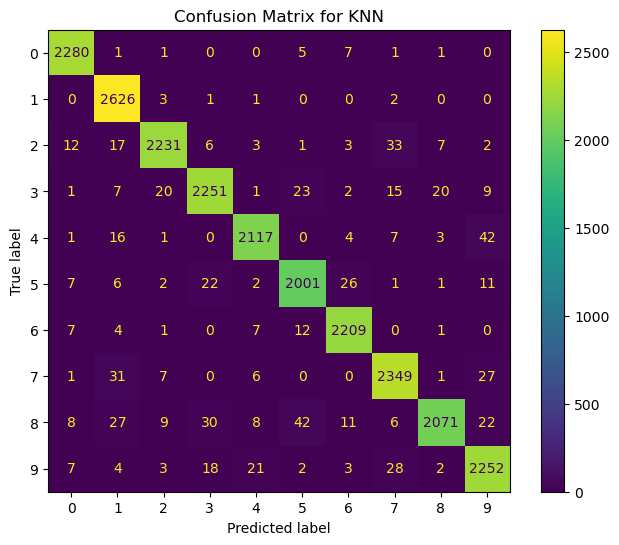

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
 
ax.set(title='Confusion Matrix for KNN')

display.plot(ax=ax);

In [22]:
from sklearn.svm import SVC

svc=SVC(C=1)

In [23]:
svc.fit(x_train, y_train)

SVC(C=1)

In [26]:
svc_pred=svc.predict(x_test)

In [28]:
print('SVM Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, svc_pred)))

SVM Model accuracy score: 0.9764


In [35]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2296
           1       0.99      0.99      0.99      2633
           2       0.97      0.98      0.98      2315
           3       0.98      0.96      0.97      2349
           4       0.96      0.98      0.97      2191
           5       0.97      0.97      0.97      2079
           6       0.98      0.98      0.98      2241
           7       0.98      0.97      0.98      2422
           8       0.97      0.97      0.97      2234
           9       0.97      0.96      0.97      2340

    accuracy                           0.98     23100
   macro avg       0.98      0.98      0.98     23100
weighted avg       0.98      0.98      0.98     23100



In [82]:
cm = confusion_matrix(y_test, svc_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2273    0    3    0    3    4    6    1    6    0]
 [   0 2615    9    2    3    0    0    2    1    1]
 [   2    1 2272    3    8    0    2   14   11    2]
 [   1    1   19 2262    0   24    0   10   27    5]
 [   1    2    4    0 2143    1    8    7    2   23]
 [   4    1    2   18    5 2025   13    0    8    3]
 [   5    2    1    0    9   12 2207    0    5    0]
 [   0   11   18    0   12    2    1 2357    3   18]
 [   3   14    9   14    6   16    5    1 2156   10]
 [   5    2    1   14   38    8    1   19    8 2244]]


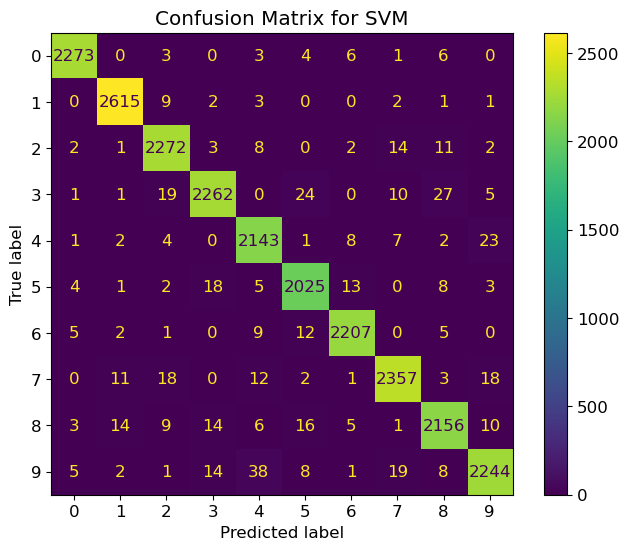

In [83]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
 
ax.set(title='Confusion Matrix for SVM')

display.plot(ax=ax);

In [31]:
from sklearn.ensemble import VotingClassifier
model1 = KNeighborsClassifier(n_neighbors=5)
model2 = SVC(C=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', KNeighborsClassifier()), ('dt', SVC(C=1))])

In [33]:
ensamble_pred= model.predict(x_test)

In [34]:
print('ensamble Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ensamble_pred)))

ensamble Model accuracy score: 0.9710


In [36]:
print(classification_report(y_test, ensamble_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2296
           1       0.96      1.00      0.98      2633
           2       0.97      0.98      0.97      2315
           3       0.96      0.97      0.96      2349
           4       0.96      0.98      0.97      2191
           5       0.96      0.97      0.96      2079
           6       0.99      0.98      0.98      2241
           7       0.97      0.97      0.97      2422
           8       0.99      0.93      0.96      2234
           9       0.98      0.94      0.96      2340

    accuracy                           0.97     23100
   macro avg       0.97      0.97      0.97     23100
weighted avg       0.97      0.97      0.97     23100



In [84]:
cm = confusion_matrix(y_test, ensamble_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2282    1    1    0    1    5    4    1    1    0]
 [   0 2628    3    1    1    0    0    0    0    0]
 [  12   17 2262    2    2    0    1   12    6    1]
 [   2    8   26 2273    1   14    0   10   12    3]
 [   2   16    4    0 2149    0    1    5    2   12]
 [   9    7    3   31    6 2011    9    0    0    3]
 [  11    4    2    0    8   14 2201    0    1    0]
 [   1   31   16    0   14    2    1 2346    1   10]
 [   9   29   15   33   11   46   10    5 2070    6]
 [   8    5    3   22   43    7    2   34    7 2209]]


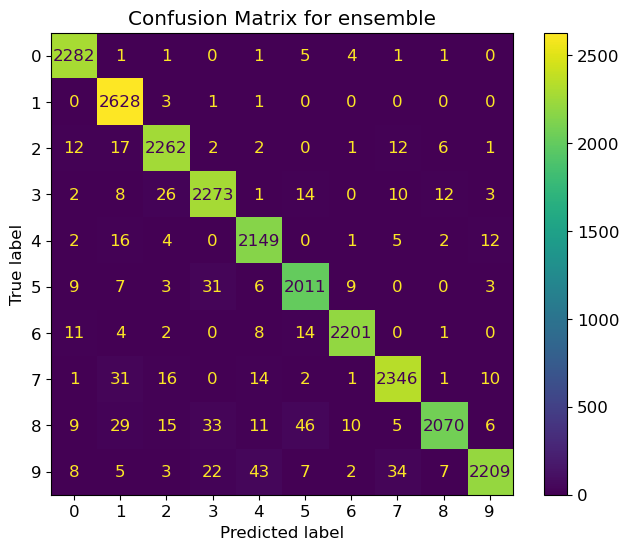

In [85]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
 
ax.set(title='Confusion Matrix for ensemble')

display.plot(ax=ax);

      0-12  0-13  0-14  0-15  1-4  1-5  1-6  1-7  1-8  1-9  ...  27-14  27-15  \
0        0     0     0     0    0    0    0    0    0    0  ...      0      0   
1        0     0     0     0    0    0    0    0    0    0  ...      0      0   
2        0     0     0     0    0    0    0    0    0    0  ...      0      0   
3        0     0     0     0    0    0    0    0    0    0  ...      0      0   
4        0     0     0     0    0    0    0    0    0    0  ...      0      0   
...    ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995     0     0     0     0    0    0    0    0    0    0  ...      0      0   
9996     0     0     0     0    0    0    0    0    0    0  ...      0      0   
9997     0     0     0     0    0    0    0    0    0    0  ...      0      0   
9998     0     0     0     0    0    0    0    0    0    0  ...      0      0   
9999     0     0     0     0    0    0    0    0    0    0  ...      0      0   

      27-16  27-17  27-18  

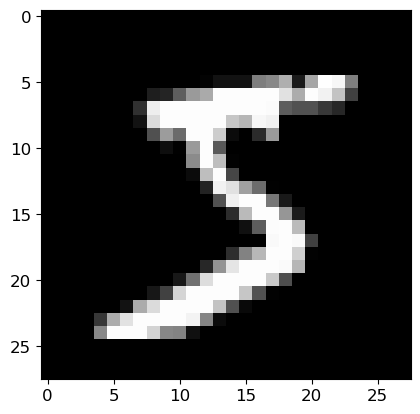

In [105]:
for i in range(0,27):
    for j in range(0,27):
        print(X[0,i,j],"  ", end="")
    print()